In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

**Regression Problem**

**Importing Modules**

In [ ]:
import pandas as pd #for data manupulation
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for plotting
import numpy as np# for numerical computation
from scipy import stats #statisticaltool
from scipy.stats import norm #statisticaltool
from scipy.stats import binned_statistic #statisticaltool
import warnings #clearer output
warnings.filterwarnings('ignore')
%matplotlib inline

**Loading dataset**

In [ ]:
train_csv = pd.read_csv('../input/train.csv')
final_csv = pd.read_csv('../input/test.csv')

**common utils**

name of columns for the problem 

In [ ]:
train_csv.columns.values

In [ ]:
print("Number of columns",len(train_csv.columns.values))

out of 81 columns 1 is our label data sales data and rest 80 is our variables it's look like the gf(sales prices) is too hot as an aftermath it has 80 bf(variables)

let's check our target status first

In [ ]:
train_csv["SalePrice"].describe()

Now check some stuff that is not helping in this case as it got too many data variables 

In [ ]:
train_csv.shape

In [ ]:
train_csv.describe() #for numerical variabls

In [ ]:
train_csv.describe(include=["O"]) #objects

In [ ]:
train_csv.info()

If you are a professor in mathematics than seeing this variable and finding a relation is not a problem for you as people who choose math likes to make relation with problem rather than human but i had 3 serious relation before so i am skipping all the variables  here. 

**Visualization**

In [ ]:
plt.figure(figsize=(15,6))
sns.distplot(train_csv["SalePrice"],color="r") #red because i am communist change according to your ideology 

**Statistical Finding** The plot is right skewed and mean is around 100-200k keep  this in mind we can have our baseline model like randomly assign everyone a tag of mean and check against  rmse wow you are so knowledgble yet don't know how to write knowledgeble 

In [ ]:
train_csv.isnull().sum()

so many null value let's inspect like bomkesh bakshi

In [ ]:
# first we'll visualize null count
plt.figure(figsize=(15,6))
null_in_train_csv = train_csv.isnull().sum()
null_in_train_csv = null_in_train_csv[null_in_train_csv > 0]
null_in_train_csv.sort_values(inplace=True,ascending=False)
null_in_train_csv.plot.bar()

These 6 variable will be our inspection materials 

In [ ]:
null_df=train_csv[["PoolQC","MiscFeature","Alley","Fence","LotFrontage","FireplaceQu"]]

In [ ]:
null_df.describe()

In [ ]:
null_df.describe(include=["O"])

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(train_csv.corr(), vmax=.8, square=True,annot=True)

In [ ]:
arr_train_cor = train_csv.corr()['SalePrice']
idx_train_cor_gt0 = arr_train_cor[arr_train_cor > 0].sort_values(ascending=False).index.tolist()
print("How many feature candidates have positive correlation with SalePrice(including itself)? %d" % len(idx_train_cor_gt0))

In [ ]:
arr_train_cor = train_csv.corr()['SalePrice']
idx_train_cor_lt0 = arr_train_cor[arr_train_cor < 0].sort_values(ascending=False).index.tolist()
print("How many feature candidates have Negative correlation with SalePrice(including itself)? %d" % len(idx_train_cor_lt0))

In [ ]:
# we shall list them all, and pick up those we're interested
arr_train_cor[idx_train_cor_gt0]

In [ ]:
# we shall list them all, and pick up those we're interested
arr_train_cor[idx_train_cor_lt0]

let's give our stake holders a demo model with our correlation value to save our jobs 

In [ ]:
idx_meta = ['SalePrice','GrLivArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'OverallQual', 'Fireplaces', 'GarageCars','EnclosedPorch','KitchenAbvGr']
train_meta = train_csv[idx_meta].copy()
train_meta.head(n=5)

In [49]:
for i in idx_meta:
    null_in = train_meta[train_meta[i].isnull()].index.tolist()
    zero_in = train_meta[i][train_meta[i] == 0].index.tolist()
    print("How many null value in {}? {} / 1460".format(i,len(null_in)))
    print("How many zero value in {}? {} / 1460" .format(i, len(zero_in)))

How many null value in SalePrice? 0 / 1460
How many zero value in SalePrice? 0 / 1460
How many null value in GrLivArea? 0 / 1460
How many zero value in GrLivArea? 0 / 1460
How many null value in MasVnrArea? 8 / 1460
How many zero value in MasVnrArea? 861 / 1460
How many null value in TotalBsmtSF? 0 / 1460
How many zero value in TotalBsmtSF? 37 / 1460
How many null value in 1stFlrSF? 0 / 1460
How many zero value in 1stFlrSF? 0 / 1460
How many null value in 2ndFlrSF? 0 / 1460
How many zero value in 2ndFlrSF? 829 / 1460
How many null value in OverallQual? 0 / 1460
How many zero value in OverallQual? 0 / 1460
How many null value in Fireplaces? 0 / 1460
How many zero value in Fireplaces? 690 / 1460
How many null value in GarageCars? 0 / 1460
How many zero value in GarageCars? 81 / 1460
How many null value in EnclosedPorch? 0 / 1460
How many zero value in EnclosedPorch? 1252 / 1460
How many null value in KitchenAbvGr? 0 / 1460
How many zero value in KitchenAbvGr? 1 / 1460


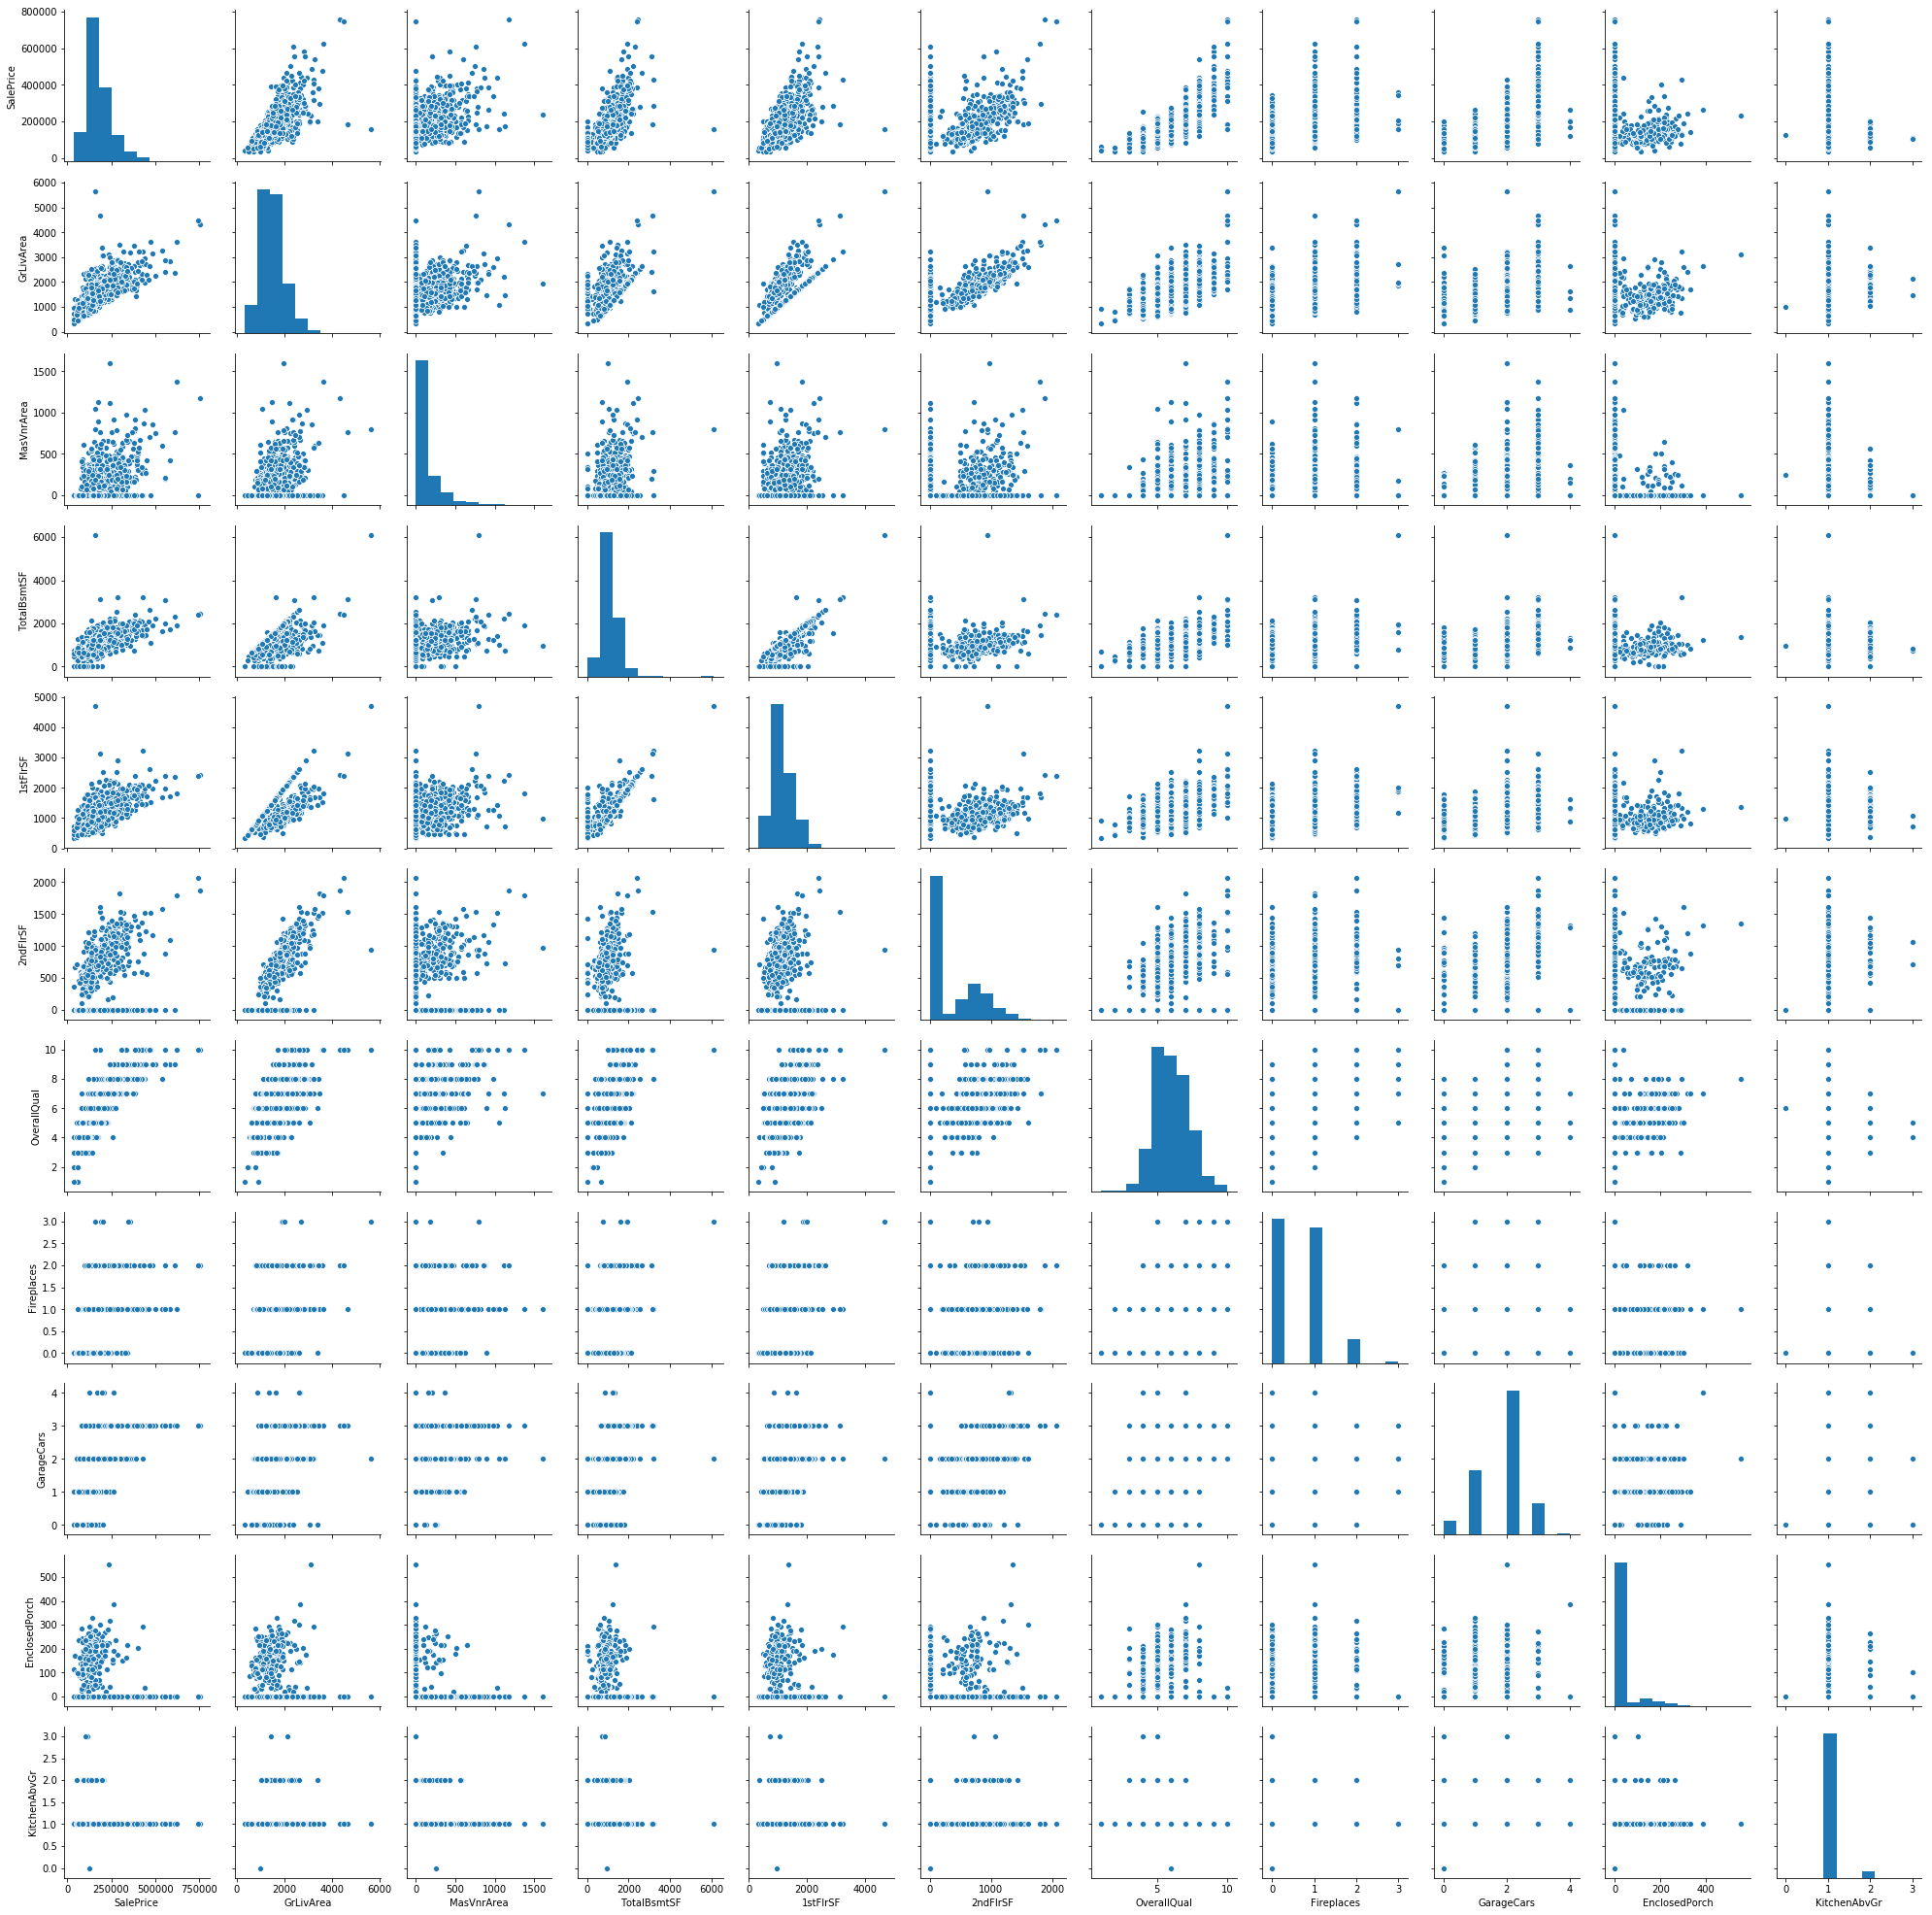

In [50]:
# overview
sns.pairplot(train_meta)

In [51]:
# GrLivArea
train_meta[(train_meta['GrLivArea'] > 4000) & (train_meta['SalePrice'] < 200000)].index.tolist()

[523, 1298]

In [52]:
# Thus, we'll remove [523, 1298]
train_clean = train_meta.drop([523,1298])

In [53]:
nonzero_in_masvnrarea = train_clean['MasVnrArea'][train_clean['MasVnrArea'] != 0].index.tolist()
print("How many non-zero value in MasVnrArea now? %d / 1458" % len(nonzero_in_masvnrarea))

How many non-zero value in MasVnrArea now? 597 / 1458


In [54]:
# I'll categorize into zero and non-zero
train_clean['has_MasVnrArea'] = 0
train_clean['has_MasVnrArea'][nonzero_in_masvnrarea] = 1

In [55]:
bins_totalbsmtsf = [-1, 1, 1004, 4000]
train_clean['binned_TotalBsmtSF'] = np.digitize(train_clean['TotalBsmtSF'], bins_totalbsmtsf)

In [56]:
train_clean['1stFlrSF'].describe()

count    1458.000000
mean     1158.851166
std       372.039498
min       334.000000
25%       882.000000
50%      1086.000000
75%      1390.750000
max      3228.000000
Name: 1stFlrSF, dtype: float64

In [57]:
bins_1stflrsf = [0, 882, 1086, 1390, 4000]
train_clean['binned_1stFlrSF'] = np.digitize(train_clean['1stFlrSF'], bins_1stflrsf)

In [58]:
train_clean['2ndFlrSF'][train_clean['2ndFlrSF'] > 0].describe()

count     629.000000
mean      801.464229
std       272.138811
min       110.000000
25%       625.000000
50%       772.000000
75%       924.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

In [59]:
bins_2ndflrsf = [-1, 1, 625, 772, 924, 4000]
train_clean['binned_2ndFlrSF'] = np.digitize(train_clean['2ndFlrSF'], bins_2ndflrsf)

In [60]:
train_clean['SFcross'] = (train_clean['binned_TotalBsmtSF'] - 1) * (5 * 4) + (train_clean['binned_1stFlrSF'] - 1) * 5 + train_clean['binned_2ndFlrSF']

In [63]:
def draw2by2log(arr):
    fig = plt.figure(figsize=(15,6));
    plt.subplot(2,2,1)
    sns.distplot(arr, fit=norm);
    plt.subplot(2,2,3)
    stats.probplot(arr, plot=plt);
    plt.subplot(2,2,2)
    sns.distplot(np.log(arr), fit=norm);
    plt.subplot(2,2,4)
    stats.probplot(np.log(arr), plot=plt);

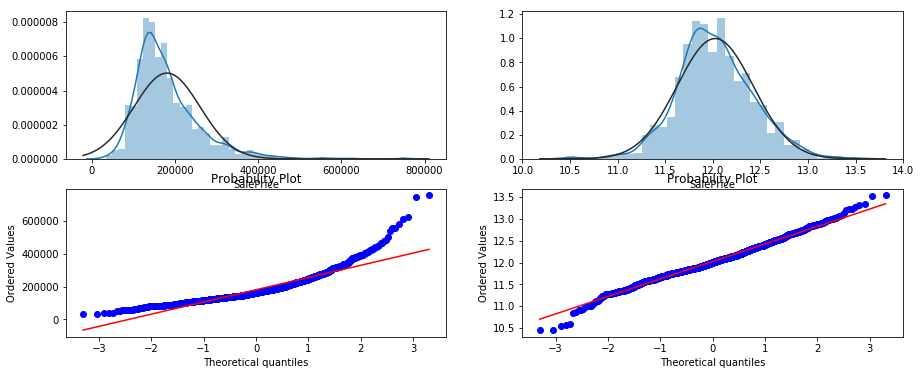

In [64]:
draw2by2log(train_clean['SalePrice'])

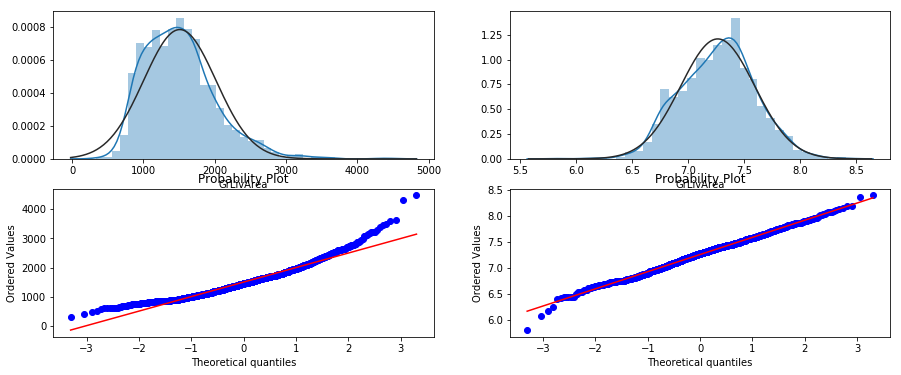

In [65]:
draw2by2log(train_clean['GrLivArea'])

In [66]:
idx_tree = ['SalePrice', 'GrLivArea', 'OverallQual', 'Fireplaces', 'GarageCars', 'has_MasVnrArea', 'SFcross']
train_tree = train_clean[idx_tree]
train_tree.head(n=5)

,SalePrice,GrLivArea,OverallQual,Fireplaces,GarageCars,has_MasVnrArea,SFcross
0,208500,1710,7,0,2,1,24
1,181500,1262,6,1,2,0,51
2,223500,1786,7,1,2,1,29
3,140000,1717,7,1,3,0,28
4,250000,2198,8,1,3,1,55


In [67]:
dummy_fields = ['OverallQual', 'Fireplaces', 'GarageCars', 'has_MasVnrArea', 'SFcross']
train_dist = train_tree[['SalePrice', 'OverallQual', 'GrLivArea']].copy()
for field in dummy_fields:
    dummies = pd.get_dummies(train_tree.loc[:, field], prefix=field)
    train_dist = pd.concat([train_dist, dummies], axis = 1)
train_dist['GarageCars_5'] = 0
train_dist['Fireplaces_4'] = 0
train_dist.head(n=5)

,SalePrice,OverallQual,GrLivArea,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,Fireplaces_0,Fireplaces_1,Fireplaces_2,Fireplaces_3,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,has_MasVnrArea_0,has_MasVnrArea_1,SFcross_1,SFcross_2,SFcross_3,SFcross_5,SFcross_6,SFcross_11,SFcross_12,SFcross_15,SFcross_16,SFcross_18,SFcross_21,SFcross_22,SFcross_23,SFcross_24,SFcross_25,SFcross_26,SFcross_27,SFcross_28,SFcross_29,SFcross_30,SFcross_31,SFcross_32,SFcross_33,SFcross_34,SFcross_35,SFcross_36,SFcross_38,SFcross_39,SFcross_40,SFcross_42,SFcross_46,SFcross_47,SFcross_48,SFcross_49,SFcross_50,SFcross_51,SFcross_52,SFcross_53,SFcross_54,SFcross_55,SFcross_56,SFcross_57,SFcross_58,SFcross_59,SFcross_60,GarageCars_5,Fireplaces_4
0,208500,7,1710,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,181500,6,1262,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,223500,7,1786,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,140000,7,1717,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,250000,8,2198,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [68]:
print("The dimension for the input of distance-based model is %d x %d" % (train_dist.shape[0], train_dist.shape[1] - 1))
# SalePrice is not input, so minus one

The dimension for the input of distance-based model is 1458 x 70


In [69]:
from sklearn.model_selection import train_test_split
random_state = 7

In [70]:
xt_train_test, xt_valid, yt_train_test, yt_valid = train_test_split(train_tree['SalePrice'], train_tree.drop('SalePrice', axis=1), test_size=.2, random_state=random_state)
xd_train_test, xd_valid, yd_train_test, yd_valid = train_test_split(train_dist['SalePrice'], train_dist.drop('SalePrice', axis=1), test_size=.2, random_state=random_state)

In [71]:
xt_train, xt_test, yt_train, yt_test = train_test_split(yt_train_test, xt_train_test, test_size=.2, random_state=random_state)
xd_train, xd_test, yd_train, yd_test = train_test_split(yd_train_test, xd_train_test, test_size=.2, random_state=random_state)

In [72]:
print("number of training set: %d\nnumber of testing set: %d\nnumber of validation set: %d\ntotal: %d" % (len(xt_train), len(xt_test), len(xt_valid), (len(xt_train)+len(xt_test)+len(xt_valid))))

number of training set: 932
number of testing set: 234
number of validation set: 292
total: 1458


In [73]:
def rmse(arr1, arr2):
    return np.sqrt(np.mean((arr1-arr2)**2))

RMSE for Linear Regression Model in sklearn: 29997.96


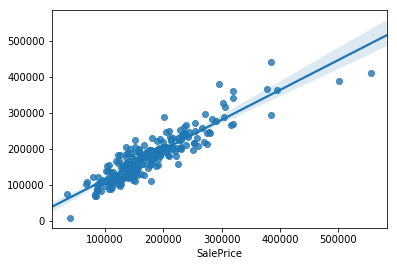

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xd_train, yd_train)
yd_lm = lm.predict(xd_test)
rmse_linear = rmse(yd_test, yd_lm)
sns.regplot(yd_test, yd_lm)
print("RMSE for Linear Regression Model in sklearn: %.2f" % rmse_linear)

In [75]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [76]:
def baseline_nn_model(dims):
    model = Sequential()
    model.add(Dense(dims, input_dim=dims,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [77]:
def larger_nn_model(dims):
    model = Sequential()
    model.add(Dense(dims, input_dim=dims,kernel_initializer='normal', activation='relu'))
    model.add(Dense(35, kernel_initializer='normal', activation='relu'))
    model.add(Dense(15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [78]:
def use_keras_nn_model(nn_model, x, y, xx, yy, epoch):
    print("start training")
    for step in range(epoch + 1):
        cost = nn_model.train_on_batch(x.as_matrix(), y.as_matrix())
        if step % 100 == 0:
            print("train cost: %.2f" % cost)
    print("start testing")
    yy_predict = nn_model.predict(xx.as_matrix()).reshape(len(yy),)
    res = rmse(yy, yy_predict)
    sns.regplot(yy, yy_predict)
    print("RMSE for NN Model in Keras(Tensorflow): %.2f" % res)
    return res

Instructions for updating:
Colocations handled automatically by placer.
start training
Instructions for updating:
Use tf.cast instead.
train cost: 38664323072.00
train cost: 38342639616.00
train cost: 37329502208.00
train cost: 35571511296.00
train cost: 33182611456.00
train cost: 30312900608.00
train cost: 27120279552.00
train cost: 23765504000.00
start testing
RMSE for NN Model in Keras(Tensorflow): 147959.66


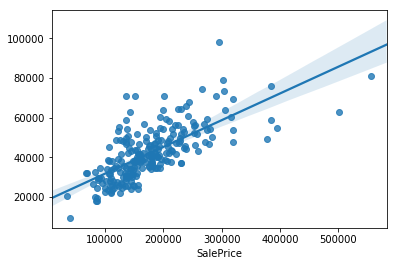

In [79]:
rmse_baselinenn = use_keras_nn_model(baseline_nn_model(xd_train.shape[1]), xd_train, yd_train, xd_test, yd_test, 700)

start training
train cost: 38661922816.00
train cost: 36952076288.00
train cost: 8574378496.00
train cost: 2862941184.00
train cost: 2858468608.00
train cost: 2853927936.00
start testing
RMSE for NN Model in Keras(Tensorflow): 50236.52


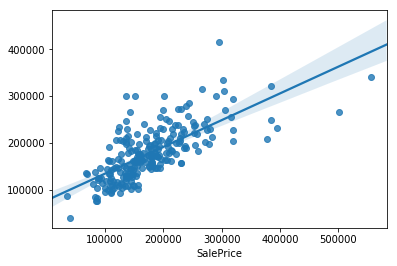

In [80]:
rmse_largernn = use_keras_nn_model(larger_nn_model(xd_train.shape[1]), xd_train, yd_train, xd_test, yd_test, 500)

In [81]:
rmse_nn = min(rmse_baselinenn, rmse_largernn)

In [82]:
import xgboost as xgb
from xgboost import plot_importance


RMSE for xgboost: 27142.91


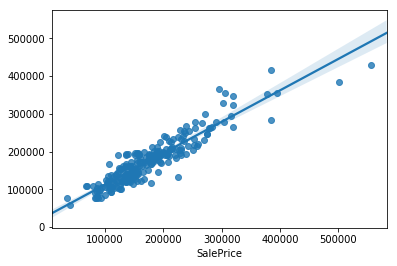

In [83]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = params.items()
dtrain = xgb.DMatrix(xt_train, yt_train)
dtest = xgb.DMatrix(xt_test)
num_rounds = 500
xgb_model = xgb.train(plst, dtrain, num_rounds)
yt_xgb = xgb_model.predict(dtest)
rmse_xgb = rmse(yt_test, yt_xgb)
sns.regplot(yt_test, yt_xgb)
print("RMSE for xgboost: %.2f" % rmse_xgb)

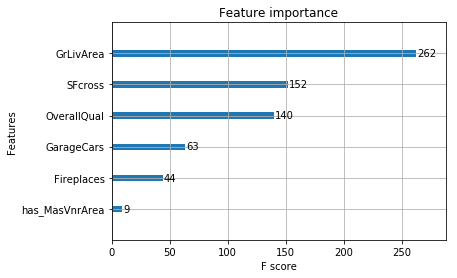

In [84]:
plot_importance(xgb_model)

In [85]:
print("The minimum RMSE goes to: %.2f" % min([rmse_linear, rmse_nn, rmse_xgb]))
# xgboost turns out to be a better model here

The minimum RMSE goes to: 27142.91


In [86]:
idx_clean_final = idx_meta.copy()
idx_clean_final.remove('SalePrice')
final_clean = final_csv[idx_clean_final]

In [87]:
final_clean['binned_TotalBsmtSF'] = np.digitize(final_clean['TotalBsmtSF'], bins_totalbsmtsf)
final_clean['binned_1stFlrSF'] = np.digitize(final_clean['1stFlrSF'], bins_1stflrsf)
final_clean['binned_2ndFlrSF'] = np.digitize(final_clean['2ndFlrSF'], bins_2ndflrsf)
final_clean['SFcross'] = (final_clean['binned_TotalBsmtSF'] - 1) * (5 * 4) + (final_clean['binned_1stFlrSF'] - 1) * 5 + final_clean['binned_2ndFlrSF']
final_clean['has_MasVnrArea'] = (final_clean['MasVnrArea'] > 0).astype(float)
final_clean.head(n=5)

,GrLivArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,OverallQual,Fireplaces,GarageCars,EnclosedPorch,KitchenAbvGr,binned_TotalBsmtSF,binned_1stFlrSF,binned_2ndFlrSF,SFcross,has_MasVnrArea
0,896,0.0,882.0,896,0,5,0,1.0,0,1,2,2,1,26,0.0
1,1329,108.0,1329.0,1329,0,6,0,1.0,0,1,3,3,1,51,1.0
2,1629,0.0,928.0,928,701,5,1,2.0,0,1,2,2,3,28,0.0
3,1604,20.0,926.0,926,678,6,1,2.0,0,1,2,2,3,28,1.0
4,1280,0.0,1280.0,1280,0,8,0,2.0,0,1,3,3,1,51,0.0


In [88]:
idx_tree_final = idx_tree.copy()
idx_tree_final.remove('SalePrice')
final_tree = final_clean[idx_tree_final]
final_tree.head(n=5)

,GrLivArea,OverallQual,Fireplaces,GarageCars,has_MasVnrArea,SFcross
0,896,5,0,1.0,0.0,26
1,1329,6,0,1.0,1.0,51
2,1629,5,1,2.0,0.0,28
3,1604,6,1,2.0,1.0,28
4,1280,8,0,2.0,0.0,51


In [89]:
dtest_final = xgb.DMatrix(final_tree)
yt_final = xgb_model.predict(dtest_final)
summission = pd.concat([final_csv['Id'], pd.DataFrame(yt_final)], axis=1)
summission.columns = ['Id', 'SalePrice']

In [90]:
summission.to_csv('summission.csv', encoding='utf-8', index = False)